In [1]:
import numpy as np
import pandas as pd
import pickle
import os
from scipy.integrate import odeint
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tqdm.notebook import trange

Define the ode system. Lotka-Voltera has is a classical predator-prey system to model the dynamics of two species that interact with each other

In [2]:
def ode_system(X, t, alpha, beta, delta, gamma):
    # Lotka-Volterra equation
    x, y = X
    dotx = x * (alpha - beta * y)
    doty = y * (-gamma + delta * x)
    return [dotx, doty]

In [11]:
tmax = 16.
time_space = np.arange(0, tmax, 0.01)
num_simulations = 1000
time_points = 160

x0 = 40
y0 = 4.
X0 = [x0, y0]

time_courses = np.empty((num_simulations, time_points, 2))
parameters = np.empty((num_simulations, 4))

for i in trange(num_simulations):
    x0 = np.random.randint(30, 40)  # Initial prey population
    y0 = np.random.randint(2, 10)  # Initial predator populatio
    X0 = [x0, y0]
    alpha = np.random.uniform(0.1, 1.0)  # Prey birth rate
    beta = np.random.uniform(0.01, 0.1)  # Predation rate
    gamma = np.random.uniform(0.1, 1.0)  # Predator death rate
    delta = np.random.uniform(0.01, 0.1)  # Predator reproduction rate

    res = odeint(ode_system, y0 = X0, t = time_space, args = (alpha, beta, delta, gamma))

    # Extract the individual trajectories.
    x, y = res.T

    # Determine the size of the array
    size = len(x)

    # Create an array of zeros
    index = np.zeros(size)

    # Set every 50th element to 1
    index[::10] = 1

    x = x[index.astype(bool)]
    y = y[index.astype(bool)]

    parameters[i] = [alpha, beta, gamma, delta]
    time_courses[i] = np.array([x, y]).T

  0%|          | 0/1000 [00:00<?, ?it/s]

In [12]:
time_courses[0].shape

(160, 2)

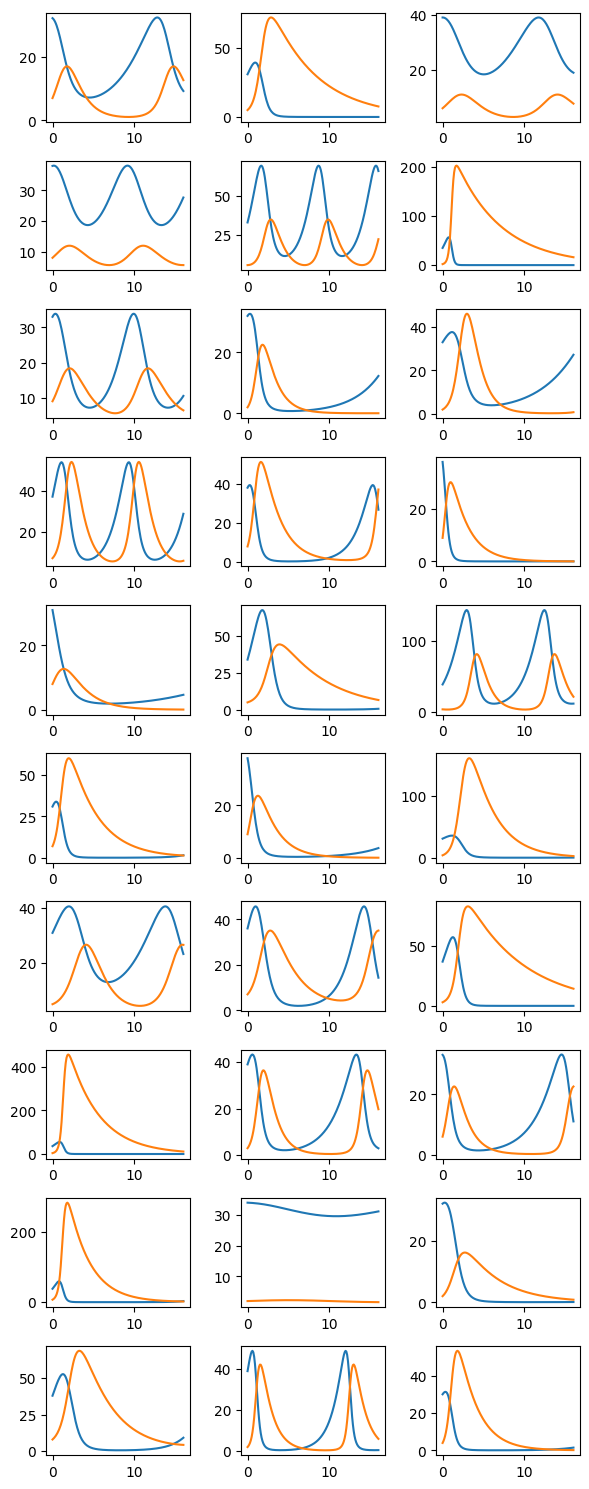

In [13]:
# Plot the first 30 strains
fig, axs = plt.subplots(10, 3, figsize=(6, 15))

time = np.linspace(0, tmax, time_points)

for i in range(10):
    for j in range(3):
        ax = axs[i, j]
        ax.plot(time, time_courses[i*3 + j])  # Change this line

plt.tight_layout()
plt.show()

In [14]:
if not os.path.exists('./data'):
    os.makedirs('./data')

suffix = 'test_randInit'
# Save parameters
np.save(f'./data/lotka_curves_{suffix}.npy', time_courses)
np.save(f'./data/lotka_params_{suffix}.npy', parameters)